<a href="https://colab.research.google.com/github/luoChengwen/Tensorflow_test/blob/master/Univariate_%2B_multivariate_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# ! pip install tensorflow==2.0.0-beta

In [0]:
# univariate lstm example
from numpy import array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
 


## Univariate LSTM

In [0]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 


In [0]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)


In [11]:
X, y

(array([[10, 20, 30],
        [20, 30, 40],
        [30, 40, 50],
        [40, 50, 60],
        [50, 60, 70],
        [60, 70, 80]]), array([40, 50, 60, 70, 80, 90]))

In [12]:
(X.shape[0], X.shape[1], 1)

(6, 3, 1)

In [22]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[102.46112]]


In [14]:
n_steps, n_features

(3, 1)

In [23]:
model2 = Sequential([
                     LSTM(50,activation ='relu', return_sequences= True, input_shape = (X.shape[1],n_features)),
                     LSTM(50,activation ='relu', return_sequences= True),
                     LSTM(30,activation ='relu'),
                     Dense(1)
])
model2.compile(optimizer='adam', loss='mse')
model2.fit(X,y, epochs=200, verbose =0)

In [21]:
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
model2.predict(x_input, verbose=0)

array([[101.84693]], dtype=float32)

In [46]:
from tensorflow.keras.layers import Bidirectional
model3 = Sequential([
                     Bidirectional(LSTM(32,activation ='relu', return_sequences=True), input_shape = (X.shape[1],n_features)),
                     LSTM(16, activation='relu'),
                     Dense(1)
])
model3.compile(optimizer='adam', loss='mse')
model3.fit(X,y, epochs=200, verbose =0)

In [47]:
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
model3.predict(x_input, verbose=0)

array([[101.68855]], dtype=float32)

## Multivariate LSTM

In [0]:

# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])


In [0]:
import matplotlib.pyplot as plt 

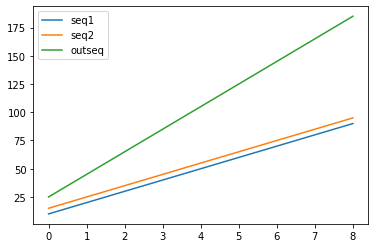

In [53]:
plt.plot(in_seq1)
plt.plot(in_seq2)
plt.plot(out_seq)
plt.legend(['seq1','seq2','outseq'])

In [54]:
in_seq1

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [0]:
import numpy as np
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = np.hstack((in_seq1, in_seq2, out_seq))


In [58]:
in_seq1

array([[10],
       [20],
       [30],
       [40],
       [50],
       [60],
       [70],
       [80],
       [90]])

In [59]:
dataset

array([[ 10,  15,  25],
       [ 20,  25,  45],
       [ 30,  35,  65],
       [ 40,  45,  85],
       [ 50,  55, 105],
       [ 60,  65, 125],
       [ 70,  75, 145],
       [ 80,  85, 165],
       [ 90,  95, 185]])

In [0]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [0]:
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)


In [65]:
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(7, 3, 2) (7,)
[[10 15]
 [20 25]
 [30 35]] 65
[[20 25]
 [30 35]
 [40 45]] 85
[[30 35]
 [40 45]
 [50 55]] 105
[[40 45]
 [50 55]
 [60 65]] 125
[[50 55]
 [60 65]
 [70 75]] 145
[[60 65]
 [70 75]
 [80 85]] 165
[[70 75]
 [80 85]
 [90 95]] 185


In [0]:
multi_model = Sequential([
                          LSTM(50, activation='relu', input_shape=(3,2)),
                          Dense(1)
])

In [0]:
multi_model.compile(optimizer='adam', loss='mse')

In [74]:
multi_model.fit(X,y, epochs=200)

Train on 7 samples
Epoch 1/200
7/7 [==============================] - 0s 1ms/sample - loss: 17700.5098
Epoch 2/200
7/7 [==============================] - 0s 718us/sample - loss: 17243.9082
Epoch 3/200
7/7 [==============================] - 0s 610us/sample - loss: 16783.2617
Epoch 4/200
7/7 [==============================] - 0s 496us/sample - loss: 16324.7256
Epoch 5/200
7/7 [==============================] - 0s 472us/sample - loss: 15869.4014
Epoch 6/200
7/7 [==============================] - 0s 544us/sample - loss: 15417.2168
Epoch 7/200
7/7 [==============================] - 0s 529us/sample - loss: 14966.7627
Epoch 8/200
7/7 [==============================] - 0s 586us/sample - loss: 14516.0449
Epoch 9/200
7/7 [==============================] - 0s 830us/sample - loss: 14065.6455
Epoch 10/200
7/7 [==============================] - 0s 1ms/sample - loss: 13614.7871
Epoch 11/200
7/7 [==============================] - 0s 1ms/sample - loss: 13157.3389
Epoch 12/200
7/7 [=====================

In [0]:
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, 3, 2))


In [76]:
x_input

array([[[ 80,  85],
        [ 90,  95],
        [100, 105]]])

In [77]:
multi_model.predict(x_input)

array([[207.3594]], dtype=float32)

In [0]:
##

# very nice post : 
https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/